## Import libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.model_selection import train_test_split # for split data into trainging, validation and testing
from sklearn.preprocessing import LabelEncoder # for encoding categorical features to numerical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # for Evaluation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

## Show downloaded data

In [64]:
df = pd.read_csv("archive/heart.csv")
print(df.head())  # Show the first few rows

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


## Encoding Categorical features

In [67]:
# Identify categorical features
categorical_features = [col for col in df.columns 
                        if not np.issubdtype(df[col].dtype, np.number) and col != "HeartDisease"]

# Create encoders for categorical features
encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_features}

# Encode categorical features in training data
for col in categorical_features:
    df[col] = encoders[col].transform(df[col])
    
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


## Split data into trainging, validation and test sets

In [70]:
# Step 1: Split 70% training, 30% temp (validation + test)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42) # using random_state(42) to garantie same splitting data

# Step 2: Split temp into 10% validation and 20% test
val_df, test_df = train_test_split(temp_df, test_size=2/3, random_state=42)

# Print dataset sizes
print(f"Total dataset: {len(df)} samples")
print(f"Training set: {len(train_df)} samples")
print(f"Validation set: {len(val_df)} samples")
print(f"Testing set: {len(test_df)} samples")

Total dataset: 918 samples
Training set: 642 samples
Validation set: 92 samples
Testing set: 184 samples


## Extract X and y

In [73]:
X_train = train_df.drop(columns=["HeartDisease"]).values
y_train = train_df["HeartDisease"].values

X_val = val_df.drop(columns=["HeartDisease"]).values
y_val = val_df["HeartDisease"].values

X_test = test_df.drop(columns=["HeartDisease"]).values
y_test = test_df["HeartDisease"].values

## Normalize the features

In [57]:
# standardize data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

 ## Feedforward Neural Network (FNN) implementation 

In [ ]:
# --- 1. Define the Neural Network ---
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer (32 neurons, ReLU)
    Dense(1, activation='sigmoid')  # Output layer (1 neuron, Sigmoid for binary classification)
])

# --- 2. Compile the Model ---
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

## Train the Model

In [ ]:
# --- 3. Train the Model ---
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),  
                    epochs=50, batch_size=8,  
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)], 
                    verbose=1)

## Evaluate on Test Data

In [ ]:
# --- 4. Evaluate on Test Data ---
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

## Evaluate on Validation Data

In [ ]:
# --- 5. Evaluate on Validation Data ---
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"\nValidation Accuracy: {val_accuracy:.2f}")

## Predictions

In [ ]:
# --- 6. Predictions ---
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)  # Convert probabilities to binary classes

y_val_pred_prob = model.predict(X_val)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

## Performance Metrics for Test Data

In [ ]:
# --- 7. Performance Metrics for Test Data ---
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\n--- Test Performance Metrics ---")
print(f"Accuracy:  {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall:    {test_recall:.2f}")
print(f"F1-Score:  {test_f1:.2f}")

## Confusion Matrix

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Heart Disease"], yticklabels=["Normal", "Heart Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Data)")
plt.show()

## Classification Reports

In [ ]:
print("\n--- Test Classification Report ---")
print(classification_report(y_test, y_test_pred, target_names=["Normal", "Heart Disease"]))

E:\omar\programs\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5996 - loss: 0.6452 - val_accuracy: 0.8152 - val_loss: 0.4931
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8215 - loss: 0.4649 - val_accuracy: 0.8261 - val_loss: 0.4135
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8305 - loss: 0.4059 - val_accuracy: 0.8261 - val_loss: 0.3876
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8241 - loss: 0.3963 - val_accuracy: 0.8261 - val_loss: 0.3703
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8376 - loss: 0.3764 - val_accuracy: 0.8261 - val_loss: 0.3666
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8377 - loss: 0.3524 - val_accuracy: 0.8152 - val_loss: 0.3623
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8421 - loss: 0.3645 - val_accuracy: 0.8261 - val_loss: 0.3549
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8434 - loss: 0.3549 - val_accuracy: 0.8261 - val_loss:

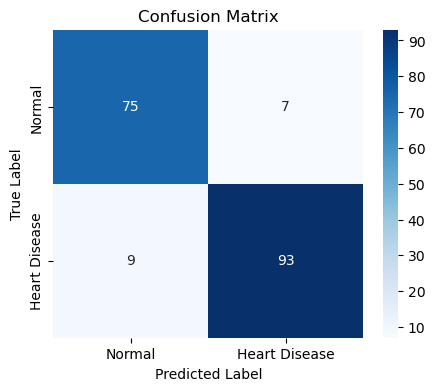


--- Classification Report ---
               precision    recall  f1-score   support

       Normal       0.89      0.91      0.90        82
Heart Disease       0.93      0.91      0.92       102

     accuracy                           0.91       184
    macro avg       0.91      0.91      0.91       184
 weighted avg       0.91      0.91      0.91       184



In [59]:
# # --- 1. Define the Neural Network ---
# model = Sequential([
#     Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer (32 neurons, ReLU)
#     Dense(1, activation='sigmoid')  # Output layer (1 neuron, Sigmoid for binary classification)
# ])

# # --- 2. Compile the Model ---
# model.compile(optimizer=Adam(learning_rate=0.001), 
#               loss=BinaryCrossentropy(),
#               metrics=['accuracy'])

# # --- 3. Train the Model ---
# history = model.fit(X_train, y_train, 
#                     validation_data=(X_val, y_val),  
#                     epochs=50, batch_size=8,  
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)], 
#                     verbose=1)

# # --- 4. Evaluate on Test Data ---
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"\nTest Accuracy: {test_accuracy:.2f}")

# # --- 5. Evaluate on Validation Data ---
# val_loss, val_accuracy = model.evaluate(X_val, y_val)
# print(f"\nValidation Accuracy: {val_accuracy:.2f}")

# # --- 6. Predictions ---
# y_test_pred_prob = model.predict(X_test)
# y_test_pred = (y_test_pred_prob > 0.5).astype(int)  # Convert probabilities to binary classes

# y_val_pred_prob = model.predict(X_val)
# y_val_pred = (y_val_pred_prob > 0.5).astype(int)

# # --- 7. Performance Metrics for Test Data ---
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_precision = precision_score(y_test, y_test_pred)
# test_recall = recall_score(y_test, y_test_pred)
# test_f1 = f1_score(y_test, y_test_pred)

# print("\n--- Test Performance Metrics ---")
# print(f"Accuracy:  {test_accuracy:.2f}")
# print(f"Precision: {test_precision:.2f}")
# print(f"Recall:    {test_recall:.2f}")
# print(f"F1-Score:  {test_f1:.2f}")

# # --- 9. Confusion Matrix (Test) ---
# cm_test = confusion_matrix(y_test, y_test_pred)
# plt.figure(figsize=(5, 4))
# sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Heart Disease"], yticklabels=["Normal", "Heart Disease"])
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix (Test Data)")
# plt.show()

# # --- 11. Classification Reports ---
# print("\n--- Test Classification Report ---")
# print(classification_report(y_test, y_test_pred, target_names=["Normal", "Heart Disease"]))